<a href="https://colab.research.google.com/github/daswa25/ML_PROJECT/blob/main/presentation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
print(f"importing Libaries")

importing Libaries


In [6]:
datasets = {}
path=[r'flood_datalogs.csv',r'uk_climate.csv',r'2024.csv']

for idx, file_name in enumerate(path):
    key = f"dataset_{idx}"
    data = pd.read_csv(file_name, index_col=0)
    datasets[key] = data
uncleaned_len = len(datasets['dataset_0'].columns)
print(f"Number of columns in dataset_0 before cleaning: {uncleaned_len}")
print("Datasets loaded suc")

FileNotFoundError: [Errno 2] No such file or directory: 'flood_datalogs.csv'

In [ ]:

class Preprocessing:
    def __init__(self, data):
        self.data = data

    def get_raw_columns(self):
        return self.data.columns

    def set_column_clean(self, flag):

        data=self.data
        match flag:
            case 0:
                if len(data.columns) != 5:
                    print(f"Warning: dataset has {len(data.columns)} columns. Renaming may fail.")
                else:
                    data.columns = ['datetime','area','ucode','warning_name','type']


                data.columns = ['datetime', 'area', 'ucode', 'warning_name', 'type']
                data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce', dayfirst=True)
                data['date'] = data['datetime'].dt.date
                data['year'] = data['datetime'].dt.year
                data['month'] = data['datetime'].dt.month
                data = data.drop(columns=['datetime'], errors='ignore')
                return data

            case 1:
                cols_to_drop = ['decade', 'day_of_year', 'day_in_year', 'year', 'month', 'day']
                data = data.drop(columns=[c for c in cols_to_drop if c in data.columns], errors='ignore')
                if all(col in self.data.columns for col in ['year', 'month', 'day']):
                    data['date'] = pd.to_datetime(
                        self.data[['year','month','day']], errors='coerce'
                    )
                    data['year'] = data['date'].dt.year
                    data['month'] = data['date'].dt.month
                if 'date' not in data.columns and 'dates' in data.columns:
                    data['date'] = pd.to_datetime(data['dates'], errors='coerce').dt.date
                return data
            case 2:
                drop_cols = [
                    '@id', 'sample.samplingPoint',
                    'codedResultInterpretation.interpretation',
                    'resultQualifier.notation'
                ]
                data = data.drop(columns=[c for c in drop_cols if c in data.columns], errors='ignore')
                expected_cols = 13
                if len(data.columns) != expected_cols:
                    raise ValueError(f"Case 3 expects {expected_cols} columns, got {len(data.columns)}")
                data.columns = [
                    'uid','location','datetime_index','description','substance_measurement',
                    'details_of_measurement','numerical_range','measured_value','measured_unit',
                    'water_source','monitoring','east','north'
                ]
                data['datetime_index'] = data['datetime_index'].astype(str).str.strip().replace({'0': None, '': None})
                data['datetime_index'] = pd.to_datetime(data['datetime_index'], errors='coerce', infer_datetime_format=True)
                data['date'] = data['datetime_index'].dt.date
                data['year'] = data['datetime_index'].dt.year
                data['month'] = data['datetime_index'].dt.month
                data = data.drop(columns=['datetime_index'], errors='ignore')
                return data
            case _:
                raise ValueError("Invalid flag for dataset cleaning")


In [4]:
flood=datasets['dataset_0']
climate=datasets['dataset_1']
water_quality=datasets['dataset_2']
#Flood Cleaning
flood_cleaned=Preprocessing(flood)
fld_df=flood_cleaned.set_column_clean(0)

#Climate Cleaning
climate_cleaned=Preprocessing(climate)
clm_df=climate_cleaned.set_column_clean(1)
#Water Quality cleaning
water_quality_cln=Preprocessing(water_quality)
wq_df=water_quality_cln.set_column_clean(2)

KeyError: 'dataset_0'

In [5]:
wq_df.head()

NameError: name 'wq_df' is not defined

In [ ]:

clm_df['date'] = pd.to_datetime(clm_df['date'], errors='coerce')
wq_df['date'] = pd.to_datetime(wq_df['date'], errors='coerce')
fld_df['date']=pd.to_datetime(fld_df['date'],errors='coerce')
wq_df=wq_df.reset_index(drop=True)
clm_df=clm_df.reset_index(drop=True)

df_merged=pd.merge(wq_df,clm_df,on='date',how='left')
df_merged = pd.merge(df_merged,fld_df, left_on=['date','location'], right_on=['date','area'], how='left')
df_merged = df_merged.drop(columns=['area'], errors='ignore')
df_merged.head()

,uid,location,description,substance_measurement,details_of_measurement,numerical_range,measured_value,measured_unit,water_source,monitoring,...,precipitation,surface_runoff,dewpoint_temp,year_y,month_y,ucode,warning_name,type,year,month
0,AN-011471,BUCKINGHAM GARDEN CENTRE,Site Inspect,Site Inspection : Pass/Fail (1/0),4883.0,1.0,coded,FINAL SEWAGE EFFLUENT,True,COMPLIANCE AUDIT (PERMIT),...,5.520531,0.138878,7.71030,2024.0,10.0,NaN,NaN,NaN,NaN,NaN
1,AN-011638,"AKELEY WOOD SENIOR SCHOOL, AKELEY WOOD",NO FLOW/SAMP,No flow /No sample,7668.0,0.0,coded,FINAL SEWAGE EFFLUENT,True,COMPLIANCE AUDIT (PERMIT),...,12.894590,0.451623,0.37628,2024.0,3.0,NaN,NaN,NaN,NaN,NaN
2,AN-011638,"AKELEY WOOD SENIOR SCHOOL, AKELEY WOOD",NO FLOW/SAMP,No flow /No sample,7668.0,0.0,coded,FINAL SEWAGE EFFLUENT,True,COMPLIANCE AUDIT (PERMIT),...,1.827896,0.019898,10.70120,2024.0,6.0,NaN,NaN,NaN,NaN,NaN
3,AN-011638,"AKELEY WOOD SENIOR SCHOOL, AKELEY WOOD",NO FLOW/SAMP,No flow /No sample,7668.0,0.0,coded,FINAL SEWAGE EFFLUENT,True,COMPLIANCE AUDIT (PERMIT),...,2.046867,0.021231,4.03950,2024.0,9.0,NaN,NaN,NaN,NaN,NaN
4,AN-011638,"AKELEY WOOD SENIOR SCHOOL, AKELEY WOOD",NO FLOW/SAMP,No flow /No sample,7668.0,0.0,coded,FINAL SEWAGE EFFLUENT,True,COMPLIANCE AUDIT (PERMIT),...,16.364792,0.891970,7.73486,2024.0,12.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91267 entries, 0 to 91266
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uid                     91267 non-null  object        
 1   location                91267 non-null  object        
 2   description             91266 non-null  object        
 3   substance_measurement   91266 non-null  object        
 4   details_of_measurement  91266 non-null  float64       
 5   numerical_range         91266 non-null  float64       
 6   measured_value          91266 non-null  object        
 7   measured_unit           91266 non-null  object        
 8   water_source            91266 non-null  object        
 9   monitoring              91266 non-null  object        
 10  east                    91266 non-null  float64       
 11  north                   91266 non-null  float64       
 12  date                    91266 non-null  dateti

In [ ]:
df_merged.describe()

,details_of_measurement,numerical_range,east,north,date,year_x,month_x,temp,wind_speed,precipitation,surface_runoff,dewpoint_temp,year_y,month_y,year,month
count,91266.000000,91266.000000,91266.000000,91266.000000,91266,91266.0,91266.000000,91266.000000,91266.000000,91266.000000,91266.000000,91266.000000,91266.0,91266.000000,0.0,0.0
mean,2766.766540,2398.729744,556618.947746,287293.520402,2024-07-01 00:13:30.360922880,2024.0,6.581235,9.686509,3.948464,7.433553,0.252430,6.796485,2024.0,6.581235,NaN,NaN
min,4.000000,-3.110000,454400.000000,179380.000000,2024-01-01 00:00:00,2024.0,1.000000,-2.249240,1.809215,0.076382,0.000568,-5.690620,2024.0,1.000000,NaN,NaN
25%,111.000000,0.061000,520990.000000,247800.000000,2024-03-26 00:00:00,2024.0,3.000000,6.374140,3.058227,2.705024,0.036268,3.588400,2024.0,3.000000,NaN,NaN
50%,162.000000,4.710000,558900.000000,274729.000000,2024-07-09 00:00:00,2024.0,7.000000,10.175070,3.854313,5.632418,0.107916,7.578150,2024.0,7.000000,NaN,NaN
75%,6019.000000,15.000000,589300.000000,319800.000000,2024-09-30 00:00:00,2024.0,9.000000,13.397640,4.630940,11.169278,0.295205,10.118830,2024.0,9.000000,NaN,NaN
max,9993.000000,648289.000000,651960.000000,423535.000000,2024-12-31 00:00:00,2024.0,12.000000,18.683280,9.394242,43.979248,3.326761,14.762540,2024.0,12.000000,NaN,NaN
std,3698.913865,33412.354163,46793.341036,53095.510255,NaN,0.0,3.413051,4.561173,1.242028,6.185865,0.363461,4.416931,0.0,3.413051,NaN,NaN


In [ ]:
df_merged[['measured_value','precipitation','surface_runoff','dewpoint_temp']].describe()


,precipitation,surface_runoff,dewpoint_temp
count,91266.000000,91266.000000,91266.000000
mean,7.433553,0.252430,6.796485
std,6.185865,0.363461,4.416931
min,0.076382,0.000568,-5.690620
25%,2.705024,0.036268,3.588400
50%,5.632418,0.107916,7.578150
75%,11.169278,0.295205,10.118830
max,43.979248,3.326761,14.762540


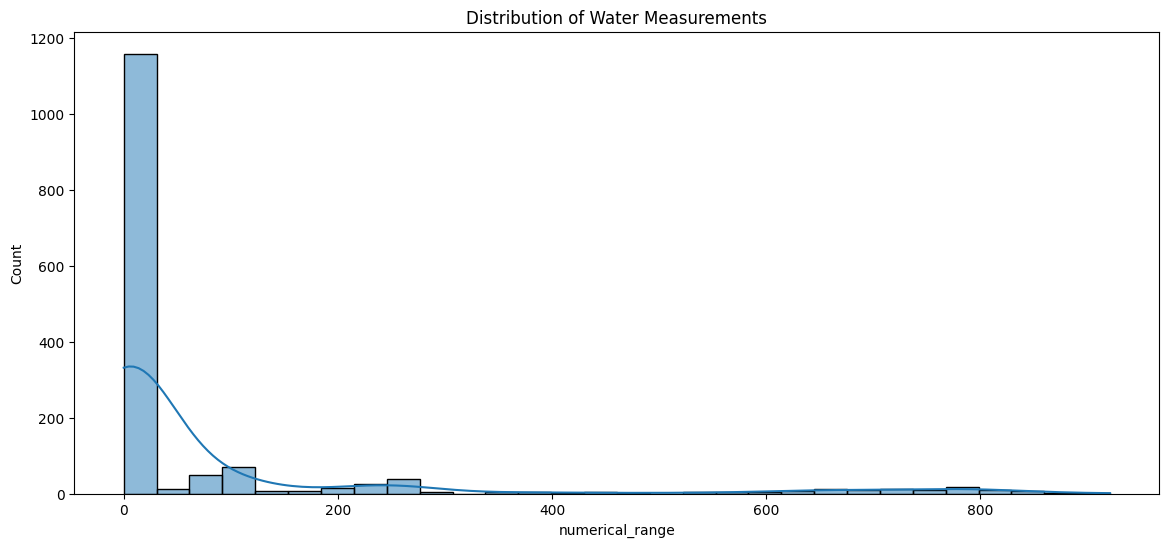

In [ ]:
plt.figure(figsize=(14, 6))
sns.histplot(df_merged['numerical_range'][:1500], kde=True,bins=30)
plt.title("Distribution of Water Measurements")
plt.show()

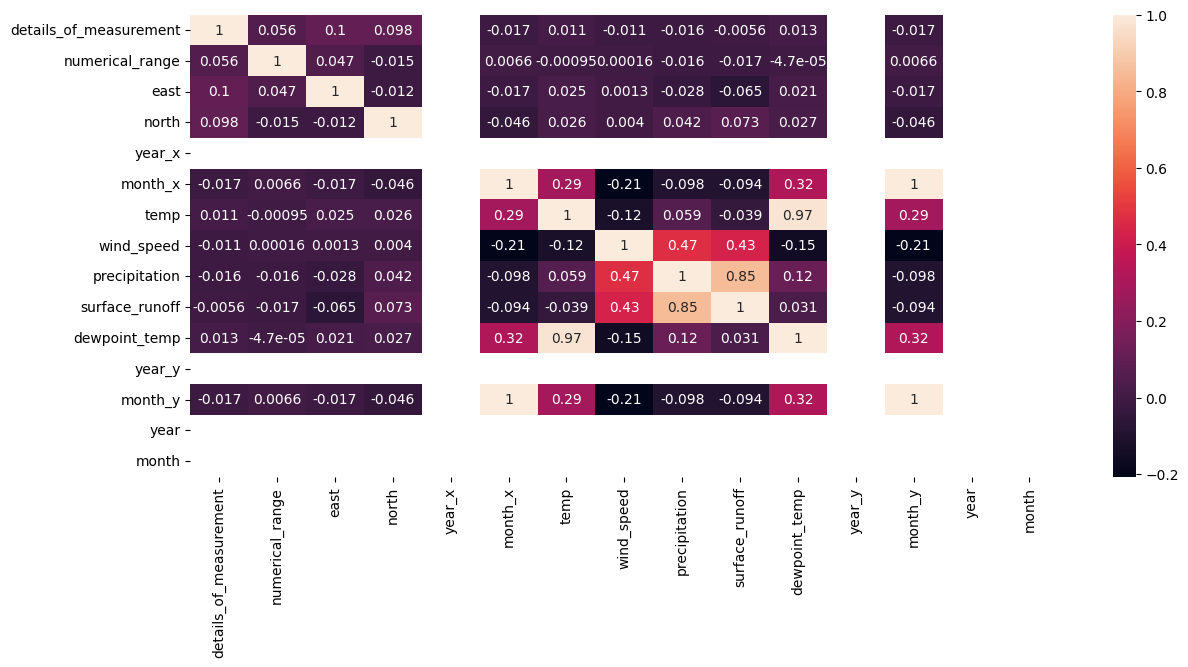

In [ ]:
plt.figure(figsize=(14, 6))
corltn=df_merged.corr('pearson',numeric_only=True)
sns.heatmap(corltn,annot=True)
plt.show()

In [ ]:
for ft_cols in ['substance_measurement','monitoring','location','type']:
  print(df_merged[ft_cols].value_counts())

substance_measurement
Temperature of Water                     5609
Ammoniacal Nitrogen as N                 4692
BOD : 5 Day ATU                          4444
Oxygen, Dissolved, % Saturation          3564
pH                                       3559
                                         ... 
Weather : Wind Direction : Degrees          2
Weather : Wind Speed : Beaufort Scale       2
Iodide                                      2
Zooplankton                                 2
Ethylene glycol :- {Ethan-1,2-diol}         1
Name: count, Length: 648, dtype: int64
monitoring
MONITORING  (NATIONAL AGENCY POLICY)                           28953
ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTIVES)             15491
MONITORING  (UK GOVT POLICY - NOT GQA OR RE)                   15472
PLANNED INVESTIGATION (LOCAL MONITORING)                       10311
WATER QUALITY OPERATOR SELF MONITORING COMPLIANCE DATA          6845
WATER QUALITY UWWTD MONITORING DATA                             2840
COMPLIAN

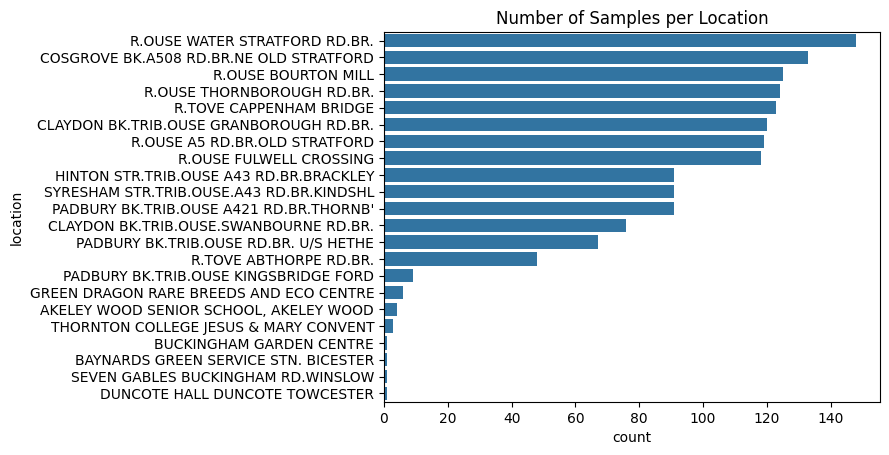

In [ ]:
sns.countplot(y='location', data=df_merged[:1500], order=df_merged['location'][:1500].value_counts().index)
plt.title("Number of Samples per Location")
plt.show()


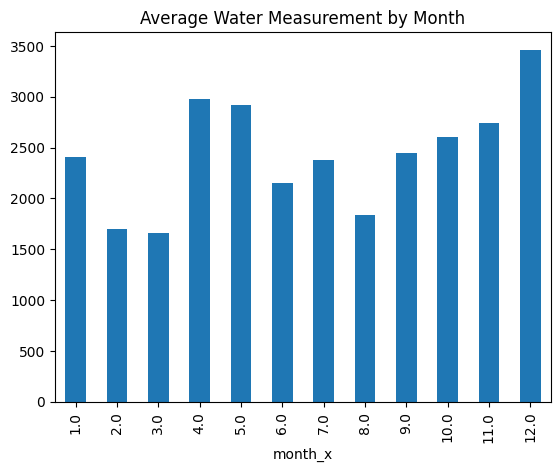

In [ ]:
df_merged.groupby('month_x')['numerical_range'].mean().plot(kind='bar')
plt.title("Average Water Measurement by Month")
plt.show()

<Axes: xlabel='date', ylabel='numerical_range'>

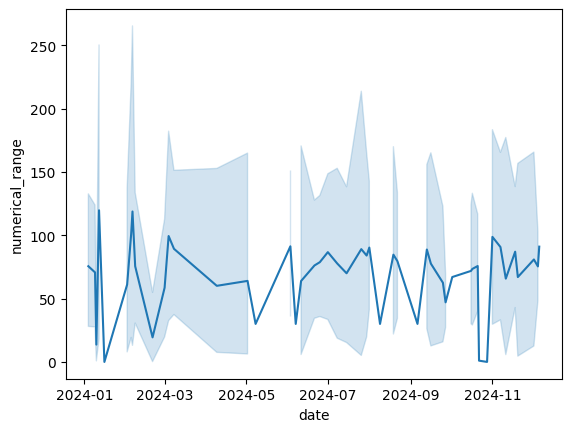

In [ ]:
sns.lineplot(x='date', y='numerical_range', data=df_merged[:1500])

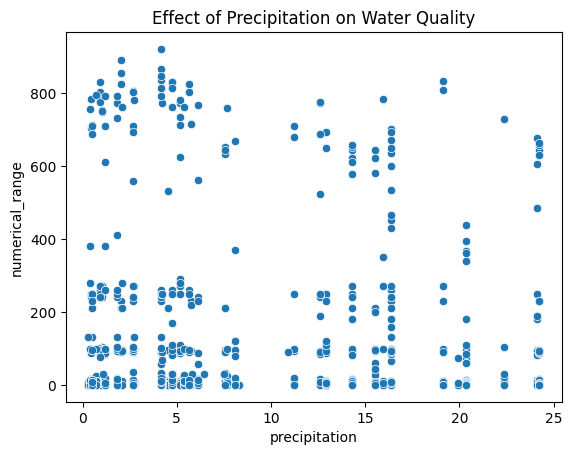

In [ ]:
sns.scatterplot(x='precipitation', y='numerical_range', data=df_merged[:1500])
plt.title("Effect of Precipitation on Water Quality")
plt.show()


In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1166524672.0000 - mae: 2845.3745 - val_loss: 878562048.0000 - val_mae: 4253.1997
Epoch 2/20
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 882457984.0000 - mae: 4005.3096 - val_loss: 877403968.0000 - val_mae: 4626.9819
Epoch 3/20
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 886392960.0000 - mae: 4177.3271 - val_loss: 876029632.0000 - val_mae: 4362.8755
Epoch 4/20
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1031212864.0000 - mae: 4437.6523 - val_loss: 874525504.0000 - val_mae: 4319.9292
Epoch 5/20
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1057308288.0000 - mae: 4526.8408 - val_loss: 870504448.0000 - val_mae: 3892.4102
Epoch 6/20
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1093238144.0000 - mae: 4404.3657 - val_loss: 864778944.0000 - val_mae: 4185.4580
Epoch 7/20
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1047420096.0000 - mae: 4485.3823 - val_loss: 852721536.0000 - val_mae: 4212.8994


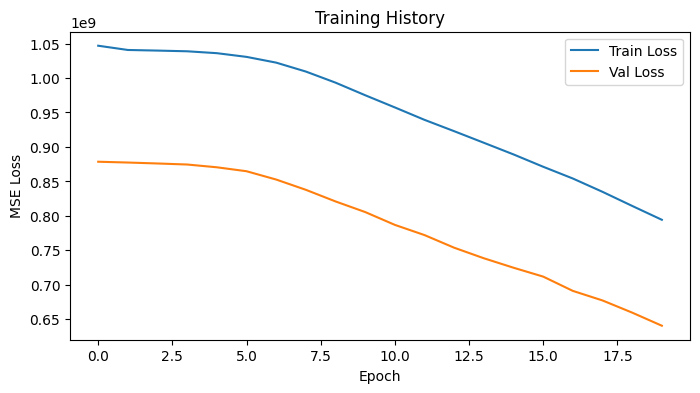

In [ ]:

# ---------------- Step 1: (Revised) Prepare target variable ----------------
# The 'numerical_range' column already contains numerical values
# and will be used as the target 'y'. We will drop rows where 'numerical_range' is NaN.
df_model = df_merged.dropna(subset=['numerical_range']).copy()


# ---------------- Step 2: Select features and target ----------------
# Select all numeric features available after dropping NaNs in target
numeric_features = df_model.select_dtypes(include=np.number).columns.tolist()

# The 'numerical_range' column is the target, so remove it from features
if 'numerical_range' in numeric_features:
    numeric_features.remove('numerical_range')

# Fill NaNs in the selected feature columns with 0.
# This is a basic imputation; more sophisticated methods could be used if needed.
X = df_model[numeric_features].fillna(0).values
y = df_model['numerical_range'].values

# ---------------- Step 3: Train-test split ----------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------- Step 4: Feature scaling ----------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------- Step 5: Build neural network ----------------
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # regression output
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# ---------------- Step 6: Train the model ----------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# ---------------- Step 7: Evaluate ----------------
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# ---------------- Step 8: Plot training history ----------------
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training History')
plt.legend()
plt.show()